In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
import random

In [2]:
def calc_precision(tp, fp):
    return tp/(tp+fp)

def calc_recall(tp, fn):
    return tp/(tp+fn)

def calc_f1(precision, recall):
    return 2/((1/recall) + (1/precision))

def calc_accuracy(tp, tn, fp, fn):
    return (tp+tn)/(tp+tn+fp+fn)

In [3]:
def cost(y_pred, y):
    cost_val = -y*np.log(y_pred) - (1-y)*np.log(1-y_pred)
    cost_val = cost_val.sum()
    
    return cost_val

In [4]:
def predict(W, b, X):
    
    predictions = []
    
    w = np.dot(X, W) + b
    
    y_vals = 1/(1+np.exp(-w))
    
    for val in y_vals:
        if val > 0.5:
            predictions.append(1)
        else:
            predictions.append(0)
            
    return predictions

In [5]:
def evaluate(y_pred , y):
    count=0
    tr_pos=0
    fal_pos=0
    tr_neg=0
    fal_neg=0
    for val in y_pred :
        if val == 1:
            if y[count] == 1:
                tr_pos+=1
            else:
                fal_pos+=1
        else:
            if y[count] == 1:
                fal_neg+=1
            else:
                tr_neg+=1
        count+=1
    precision = calc_precision(tr_pos, fal_pos)
    recall = calc_recall(tr_pos, fal_neg)
    f1 = calc_f1(precision, recall)
    accuracy = calc_accuracy(tr_pos, tr_neg, fal_pos, fal_neg)
    return precision, recall, f1, accuracy

In [6]:
#Some global variables
Accuracy =[]
Accuracy_t =[]
AccuracySGD=[]
AccuracySGD_t=[]

Loss=[]
LossSGD =[]

Fscore = []
Fscore_t = []
FscoreSGD=[]
FscoreSGD_t=[]

Precision=[]
Precision_t=[]
PrecisionSGD =[]
PrecisionSGD_t =[]

Recall=[]
Recall_t=[]
RecallSGD=[]
RecallSGD_t=[]

wGD=[]
bGD=[]
wSGD=[]
bSGD=[]

In [7]:
def LogisticRegression(lr, iterations, X, y) :  
    rows , features  = X.shape
    weights = np.zeros(features)
    bias = 0
    y = y.reshape((y.shape[0],))
    l = []
    a = []
    for i in range(iterations):
        w = np.dot(X , weights) + bias
        y_pred = 1/(1+np.exp(-w))
        delta_w = np.dot(X.T , y_pred - y)
        delta_b = np.sum(y_pred - y)
        weights = weights - lr*(delta_w)
        bias = bias - lr*(delta_b)
        binary_pred = [1 if i>0.5 else 0 for i in y_pred]
        if i%50 == 0 :
            l.append(cost(y_pred , y))  
            a.append(((binary_pred == y).sum()/len(y)))
    return weights,bias,l,a

In [8]:
 def LogisticRegressionSGD(lr,iterations  ,X  , y) :
    rows , features  = X.shape
    weights = np.zeros(features) 
    bias = 0
    y = y.reshape((y.shape[0],))
    l=[]
    a=[]
    iter_no = 0
    for i in range(iterations):
        random_number = random.randint(0, len(y)-1)   
        x_b, y_b = X[random_number], y[random_number]
        
        w = np.dot(x_b, weights) + bias
        y_pred = 1/(1+np.exp(-w))
        delta_w = np.dot(x_b.T , y_pred - y_b)
        delta_b = np.sum(y_pred - y_b)
        weights = weights - lr*(delta_w)
        bias = bias - lr*(delta_b)
        binary_pred = predict(weights,bias,X)
        iter_no+=1   
        if iter_no%50==0:
            l.append(cost(y_pred , y_b))
            precision, recall, f1, accuracy = evaluate(binary_pred , y)
            a.append(accuracy)
                
    return weights,bias,l,a      


In [9]:
df = pd.read_csv('dataset_LR.csv')

In [10]:
# df.head()

In [11]:
for j in range(10):     
    lrate= 0.001
    no_iter=10000
    df_random = df.sample(frac=1)
    rows , cols = df_random.shape
    
    a = int((70*rows)/100)
    
    df_train =  df_random.head(a)
    df_test =  df_random.tail(rows-a)

    X = df_train.iloc[: , 0:4]
    y = df_train.iloc[: , -1:]

    np_X = X.to_numpy()
    np_y = y.to_numpy()

    weights,bias,los, acc = LogisticRegression(lrate , no_iter , np_X , np_y)
    wGD.append(weights)
    bGD.append(bias)
    weightsSGD , biasSGD , lSGD , aSGD = LogisticRegressionSGD(lrate , no_iter, np_X , np_y)
    wSGD.append(weightsSGD)
    bSGD.append(biasSGD)
    Loss.append(los[-1])

    print("\n\nSample:",j+1)
    
    print("Gradient Descent")
    print("Loss :",los[-1])
    
    print("\nTrain Results")
    predicted = predict(weights , bias , np_X)
    precision, recall, f1, accuracy = evaluate(predicted , np_y)    
    Accuracy.append(accuracy)
    Fscore.append(f1)
    Precision.append(precision)
    Recall.append(recall)
    print("Recall = ",recall)
    print("Precision = ",precision)
    print("F1 score = ",f1)
    print("Accuracy = ",accuracy)
    
    print("\nTest Results")
    X_test = df_test.iloc[: , 0:4]
    y_test = df_test.iloc[: , -1:]
    np_X_t = X_test.to_numpy()
    np_y_t = y_test.to_numpy()
    np_y_t = np_y_t.reshape((np_y_t.shape[0],))
    
    predicted = predict(weights , bias , np_X_t)
    precision, recall, f1, accuracy = evaluate(predicted , np_y_t)
    Accuracy_t.append(accuracy)
    Fscore_t.append(f1)
    Precision_t.append(precision)
    Recall_t.append(recall)
    print("Recall = ",recall)
    print("Precision = ",precision)
    print("F1 score = ",f1)
    print("Accuracy = ",accuracy)
    

    
    print("\n\nStochastic Gradient Descent")
    print("Loss :",lSGD[-1])

    
    print("\nTrain Results")
    predicted = predict(weightsSGD , biasSGD , np_X)
    precision, recall, f1, accuracy = evaluate(predicted , np_y)
    AccuracySGD.append(accuracy)
    LossSGD.append(lSGD[-1])
    FscoreSGD.append(f1)
    PrecisionSGD.append(precision)
    RecallSGD.append(recall)    
    print("Recall = ",recall)
    print("Precision = ",precision)
    print("F1 score = ",f1)
    print("Accuracy = ",accuracy)
    
    print("\nTest Results")
    predicted = predict(weightsSGD , biasSGD , np_X_t)
    precision, recall, f1, accuracy = evaluate(predicted , np_y_t)
    AccuracySGD_t.append(accuracy)
    FscoreSGD_t.append(f1)
    PrecisionSGD_t.append(precision)
    RecallSGD_t.append(recall)
    print("Recall = ",recall)
    print("Precision = ",precision)
    print("F1 score = ",f1)
    print("Accuracy = ",accuracy)
    

    



Sample: 1
Gradient Descent
Loss : 15.376135529707788

Train Results
Recall =  0.9903381642512077
Precision =  0.9903381642512077
F1 score =  0.9903381642512077
Accuracy =  0.9916666666666667

Test Results
Recall =  0.9897959183673469
Precision =  0.9948717948717949
F1 score =  0.9923273657289002
Accuracy =  0.9927184466019418


Stochastic Gradient Descent
Loss : 0.002856308889302399

Train Results
Recall =  0.9541062801932367
Precision =  0.9850374064837906
F1 score =  0.9693251533742332
Accuracy =  0.9739583333333334

Test Results
Recall =  0.9693877551020408
Precision =  0.979381443298969
F1 score =  0.9743589743589742
Accuracy =  0.9757281553398058


Sample: 2
Gradient Descent
Loss : 12.19716810701171

Train Results
Recall =  0.993006993006993
Precision =  0.993006993006993
F1 score =  0.993006993006993
Accuracy =  0.99375

Test Results
Recall =  0.9779005524861878
Precision =  0.9888268156424581
F1 score =  0.9833333333333334
Accuracy =  0.9854368932038835


Stochastic Gradient D

In [12]:
print("\n\nAverage values")


print("\nGradient Decent")
print("Loss :",mean(Loss))

print("\nTrain Results")
print("Accuracy = " ,mean(Accuracy))
print("Precision = ",mean(Precision))
print("Recall = ",mean(Recall))
print("F score = ",mean(Fscore))



Average values

Gradient Decent
Loss : 16.381503564487296

Train Results
Accuracy =  0.9915625
Precision =  0.9900092233145883
Recall =  0.9907265687932083
F score =  0.99036572180202


In [13]:
print("\nTest Results")
print("Accuracy = " ,mean(Accuracy_t))
print("Precision = ",mean(Precision_t))
print("Recall = ",mean(Recall_t))
print("F score = ",mean(Fscore_t))


Test Results
Accuracy =  0.9900485436893204
Precision =  0.9905565767509728
Recall =  0.9877768750901486
F score =  0.9891472025515899


In [14]:
print("\nStochastic Gradient Decent")
print("Loss = ",mean(LossSGD))

print("\nTrain Results")
print("Accuracy = " ,mean(AccuracySGD))
print("Precision = ",mean(PrecisionSGD))
print("Recall = ",mean(RecallSGD))
print("F score = ",mean(FscoreSGD))


Stochastic Gradient Decent
Loss =  0.04355602797724349

Train Results
Accuracy =  0.9730208333333333
Precision =  0.9821696625176162
Recall =  0.9557358090658554
F score =  0.9687652230398358


In [15]:
print("\nTest Results")
print("Accuracy = " ,mean(AccuracySGD_t))
print("Precision = ",mean(PrecisionSGD_t))
print("Recall = ",mean(RecallSGD_t))
print("F score = ",mean(FscoreSGD_t))


Test Results
Accuracy =  0.9733009708737864
Precision =  0.9802034577076058
Recall =  0.9615412062303599
F score =  0.9707193483532256


In [16]:
LearningRate = [0.001 , 0.0001 , 0.00001]


For Learning Rate =  0.001
Gradient Descent Accuracy =  0.990625


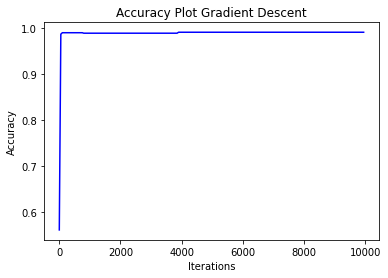

Stochastic Gradient Descent Accuracy:  0.975


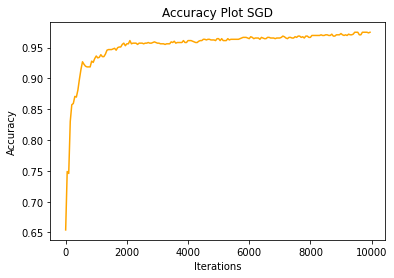


For Learning Rate =  0.0001
Gradient Descent Accuracy =  0.99375


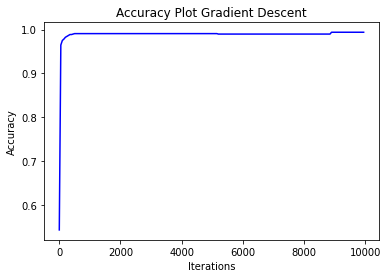

Stochastic Gradient Descent Accuracy:  0.9364583333333333


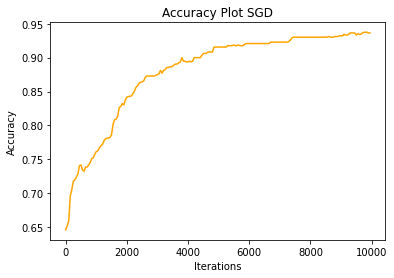


For Learning Rate =  1e-05
Gradient Descent Accuracy =  0.9864583333333333


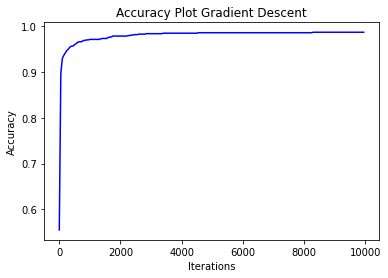

Stochastic Gradient Descent Accuracy:  0.765625


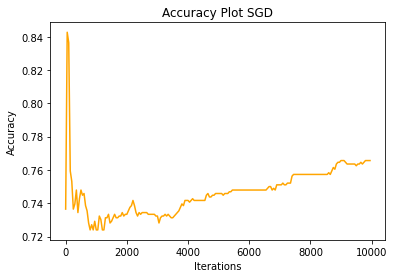

In [17]:
for lrate in LearningRate :
    print('\nFor Learning Rate = ',lrate)
    df_random = df.sample(frac=1)
    rows , cols = df_random.shape
    a = int((70*rows)/100)
    df_train =  df_random.head(a)
    df_test =  df_random.tail(rows-a)
    X = df_train.iloc[: , 0:4]
    y = df_train.iloc[: ,-1:]
    np_X = X.to_numpy()
    np_y = y.to_numpy()
    weights , bias , los, acc= LogisticRegression(lrate , no_iter , np_X , np_y)
    weightsSGD , biasSGD , lSGD , aSGD = LogisticRegressionSGD(lrate ,no_iter , np_X , np_y)
    iter = []
    for i in range(len(los)):
        iter.append(i*50)
    print("Gradient Descent Accuracy = ",(acc[-1]))
    plt.plot(iter,acc,label="Gradient Descent",color='blue')
    plt.title("Accuracy Plot Gradient Descent")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()
        
    print("Stochastic Gradient Descent Accuracy: ",(aSGD[-1]))
    plt.plot(iter,aSGD,label="Stochastic Gradient Descent",color='orange')
    plt.title("Accuracy Plot SGD")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()    